### Importamos el grafo el grafo

In [2]:
import networkx as nx
grafo_metro = nx.read_gexf('grafo.gexf')

## Análisis de métricas

#### Centralidad de intermediación

In [3]:
bet_centr = nx.betweenness_centrality(grafo_metro, normalized=True)
top10_bet = sorted(bet_centr.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (betweenness centrality):", top10_bet)

Top 10 (betweenness centrality): [('GREGORIO MARAÑON', 0.3206889964864552), ('PRINCIPE PIO', 0.3110316932567965), ('NUEVOS MINISTERIOS', 0.30813076302443476), ('ALONSO MARTINEZ', 0.2941844623794832), ('AVENIDA DE AMERICA', 0.2821502113320057), ('CASA DE CAMPO', 0.2549897088849371), ('LAGO', 0.2456132681288283), ('BATAN', 0.2401614470131068), ('TRIBUNAL', 0.22886156413127368), ('COLONIA JARDIN', 0.22510373443983403)]


Esto nos indica que si vas de una parada cualquiera a otra cualquiera, la probabilidad de pasar por Gregorio Marañón es de un 32.07%. 

Así mismo, en esta lista están las 10 paradas con mayor probabilidad de que pases por ellas tomando de origen y destino cualquier pareja de paradas

#### Centralidad de cercanía

In [4]:
closeness_dict = nx.closeness_centrality(grafo_metro.to_undirected())
top10_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (closeness centrality, sin dirección):", top10_closeness)

Top 10 (closeness centrality, sin dirección): [('GREGORIO MARAÑON', 0.1110087517273146), ('ALONSO MARTINEZ', 0.11090658076392085), ('TRIBUNAL', 0.10831460674157303), ('AVENIDA DE AMERICA', 0.10802330793366204), ('NUÑEZ DE BALBOA', 0.10635481023830538), ('RUBEN DARIO', 0.105562855891371), ('BILBAO', 0.1052861511577108), ('NUEVOS MINISTERIOS', 0.10524017467248908), ('PLAZA DE ESPAÑA', 0.10501089324618737), ('DIEGO DE LEON', 0.10401381096245145)]


La medida de centralidad de cercanía de una parada nos indica cómo de rápido (en número de saltos) es viajar desde la parada a cualquier otra parada. Es decir, en este caso, el promedio de saltos desde Gregorio Marañón a cualquier otra parada es el más pequeño, por lo que si empiezas desde cualquier otra parada, el promedio de saltos en un viaje será mayor que si empiezas desde Gregorio Marañón.

Esto nos puede indicar que, por ejemplo, basándonos en el número de saltos, Gregorio Marañon es una buena parada para hacer un transbordo, ya que estadísticamente el número de saltos que nos quedarán hasta el destino será lo más pequeño posible.

Por último, es interesante destacar que, a partir de esta medida se puede obtener el número de saltos promedio mediante la fórmula 1/C(u), donde C(u) es el resultado de la medida normalizado. Esta fórmula se obtiene a partir de la función que define C(u). En el caso de Gregorio Marañón, el número de saltos promedio para viajar a cualquier otra parada es 1/0.1110 = (aprox.) 9 saltos.

#### Centralidad de autovector

In [5]:
# Eigenvector Centrality
ev_centrality = nx.eigenvector_centrality(grafo_metro.to_undirected(), max_iter=1000)
top10_ev = sorted(ev_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (Eigenvector Centrality):", top10_ev)

Top 10 (Eigenvector Centrality): [('SOL', 0.2958268151352471), ('CALLAO', 0.28867993540407444), ('ALONSO MARTINEZ', 0.27531854126388683), ('GRAN VIA', 0.2728336039682848), ('TRIBUNAL', 0.2663567719494338), ('OPERA', 0.25780696822666166), ('AVENIDA DE AMERICA', 0.2349363632195224), ('PLAZA DE ESPAÑA', 0.2320074164519681), ('PRINCIPE PIO', 0.1990944046962476), ('BILBAO', 0.1964460006183012)]


La centralidad de autovector indica la conectividad de un nodo, basándose en cuantos nodos está conectados y si, a su vez, esos nodos tienen buena puntuación de conectividad, es decir, están bien conectados. Es decir, en este caso, los resultados nos indican que la parada de Sol es una parada "importante" o "bien conectada" con otras paradas que están bien conectadas.

Una conclusión que se puede sacar es que, por la zona de la parada de Sol hay mucha flexibilidad de movimiento, es decir, puedes moverte en muchas direcciones y enlazar con muchas paradas diferentes en el minimo numero de saltos en promedio.

#### Page Rank (Rango de página)

In [8]:
# PageRank
pagerank_dict = nx.pagerank(grafo_metro, alpha=0.85)
top10_pr = sorted(pagerank_dict.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 (PageRank):", top10_pr)

Top 10 (PageRank): [('AVENIDA DE AMERICA', 0.00926810652463553), ('SOL', 0.00807972492722613), ('PLAZA DE CASTILLA', 0.008014180688882303), ('ALONSO MARTINEZ', 0.007580204792482841), ('CUATRO CAMINOS', 0.006994415130477095), ('OPORTO', 0.006877388240671521), ('PRINCIPE PIO', 0.006858128408605104), ('MAR DE CRISTAL', 0.006840761802046134), ('PUEBLO NUEVO', 0.0067879835986301915), ('LEGAZPI', 0.0067816343046739665)]


La medidad de rango de página evalua cuan probable es llegar a un nodo si navegamos aleatoriamente por enlaces contíguos.

De alguna manera, indica cuan probable es llegar al nodo, o cuan accessible es un nodo. En este caso, los resultados apuntan a que Avenida de América es una parada muy accesible o a la que es relativamente fácil llegar.

## Análisis de comunidades

#### Louvain

In [9]:
from networkx.algorithms import community

# Aplicamos Louvain, asumiendo un grafo sin pesos
communities_louvain = community.louvain_communities(grafo_metro, weight=None, resolution=1.0, seed=42)
print(f"Número de comunidades detectadas: {len(communities_louvain)}")
print(f"Comunidades (primeras 3): {list(communities_louvain)[:3]}")


Número de comunidades detectadas: 14
Comunidades (primeras 3): [{'HOSPITAL DE FUENLABRADA', 'SAN NICASIO', 'PARQUE LISBOA', 'MOSTOLES CENTRAL', 'PARQUE EUROPA', 'JULIAN BESTEIRO', 'CASA DEL RELOJ', 'GETAFE CENTRAL', 'PUERTA DEL SUR', 'FUENLABRADA CENTRAL', 'ALCORCON CENTRAL', 'LOS ESPARTALES', 'LEGANES CENTRAL', 'EL CARRASCAL', 'LORANCA', 'PRADILLO', 'UNIVERSIDAD REY JUAN CARLOS', 'EL BERCIAL', 'MANUELA MALASAÑA', 'ALONSO DE MENDOZA', 'JOAQUIN VILUMBRALES', 'ARROYO CULEBRO', 'HOSPITAL DE MOSTOLES', 'HOSPITAL SEVERO OCHOA', 'PARQUE DE LOS ESTADOS', 'JUAN DE LA CIERVA', 'PARQUE OESTE', 'CONSERVATORIO', 'EL CASAR'}, {'ALUCHE', 'CASA DE CAMPO', 'BATAN', 'COLONIA JARDIN', 'EUGENIA DE MONTIJO', 'EMPALME', 'VISTA ALEGRE', 'CAMPAMENTO', 'CUATRO VIENTOS', 'AVIACION ESPAÑOLA', 'CARABANCHEL'}, {'SEVILLA', 'SANTO DOMINGO', 'BANCO DE ESPAÑA', 'ALONSO MARTINEZ', 'MONCLOA', 'GRAN VIA', 'VENTURA RODRIGUEZ', 'PLAZA DE ESPAÑA', 'NOVICIADO', 'PRINCIPE PIO', 'SAN BERNARDO', 'BILBAO', 'RETIRO', 'OPERA', 'T

Las comunidades son grupos de nodos que se consideran cercanos entre si o estrechamente relacionados. Aunque la solución no es siempre exactamente la misma porque depende de un parámetro de aleatoriedad (dependiendo de en qué nodo empiece el algoritmo, llegará a unas soluciones u otras), nosotros hemos utilizado la semilla 42 (seed = 42) para obtener el mismo resultado en todas las iteraciones.

En este caso, y habiendo hecho pruebas con otras semillas, llegamos a la conclusión de que hay al rededor de 14-16 grupos de nodos que se pueden considerar cercanos. Dicho de otra manera, hay como 14-16 grupos de paradas que están bien interconectadas entre ellas, por lo que la movilidad dentro de los grupos debería ser relativamente ágil o flexible (en base al número de saltos).

#### Girvan-Newman

In [6]:
# Lento
gn_generator = community.girvan_newman(grafo_metro)
first_partition = next(gn_generator)
print("Partición con 2 comunidades:", [list(c) for c in first_partition])
second_partition = next(gn_generator)
print("Partición con 3 comunidades:", [list(c) for c in second_partition])

Partición con 2 comunidades: [['COLON', 'PUEBLO NUEVO', 'PAN BENDITO', 'LAGUNA', 'PROSPERIDAD', 'FUENCARRAL', 'MONTECARMELO', 'ALTO DEL ARENAL', 'ESTRECHO', 'TIRSO DE MOLINA', 'SAN FERMIN-ORCASUR', 'VALDEACEDERAS', 'CARABANCHEL ALTO', 'VALDECARROS', 'VICALVARO', 'PRINCIPE PIO', 'BAMBU', 'SANTO DOMINGO', 'LA ALMUDENA', 'MENDEZ ALVARO', 'ARGANZUELA-PLANETARIO', 'SAINZ DE BARANDA', 'GOYA', 'AVENIDA DE AMERICA', 'HENARES', 'ESPERANZA', 'CARTAGENA', 'OPORTO', 'ANTON MARTIN', 'VENTAS', 'PINAR DE CHAMARTIN', 'PALOS DE LA FRONTERA', 'BARRIO DE LA CONCEPCION', 'VILLAVERDE ALTO', 'MIGUEL HERNANDEZ', 'AEROPUERTO T-4', 'AVENIDA DE LA PAZ', 'ALSACIA', 'CANILLEJAS', 'PINAR DEL REY', 'SIERRA DE GUADALUPE', 'FERIA DE MADRID', 'PARQUE DE LAS AVENIDAS', 'ASCAO', 'HOSPITAL 12 DE OCTUBRE', 'TRES OLIVOS', 'NUEVOS MINISTERIOS', 'CIUDAD DE LOS ANGELES', 'GREGORIO MARAÑON', 'RIVAS URBANIZACIONES', 'ATOCHA', 'ABRANTES', 'OPERA', 'DIEGO DE LEON', "O'DONNELL", 'BUENOS AIRES', 'MONCLOA', 'CANILLAS', 'BANCO DE ESP

In [7]:
# Para optimizar el cálculo, se puede trabajar con subsets:
nodes_subset = list(grafo_metro.nodes())[:500]
G_subset = grafo_metro.subgraph(nodes_subset).copy()
gn_generator = community.girvan_newman(G_subset)
first_partition = next(gn_generator)
print("Partition with 2 communities:", [list(c) for c in first_partition])
second_partition = next(gn_generator)
print("Partition with 3 communities:", [list(c) for c in second_partition])

Partition with 2 communities: [['COLON', 'PUEBLO NUEVO', 'PAN BENDITO', 'LAGUNA', 'PROSPERIDAD', 'FUENCARRAL', 'MONTECARMELO', 'ALTO DEL ARENAL', 'ESTRECHO', 'TIRSO DE MOLINA', 'SAN FERMIN-ORCASUR', 'VALDEACEDERAS', 'CARABANCHEL ALTO', 'VALDECARROS', 'VICALVARO', 'PRINCIPE PIO', 'BAMBU', 'SANTO DOMINGO', 'LA ALMUDENA', 'MENDEZ ALVARO', 'ARGANZUELA-PLANETARIO', 'SAINZ DE BARANDA', 'GOYA', 'AVENIDA DE AMERICA', 'HENARES', 'ESPERANZA', 'CARTAGENA', 'OPORTO', 'ANTON MARTIN', 'VENTAS', 'PINAR DE CHAMARTIN', 'PALOS DE LA FRONTERA', 'BARRIO DE LA CONCEPCION', 'VILLAVERDE ALTO', 'MIGUEL HERNANDEZ', 'AEROPUERTO T-4', 'AVENIDA DE LA PAZ', 'ALSACIA', 'CANILLEJAS', 'PINAR DEL REY', 'SIERRA DE GUADALUPE', 'FERIA DE MADRID', 'PARQUE DE LAS AVENIDAS', 'ASCAO', 'HOSPITAL 12 DE OCTUBRE', 'TRES OLIVOS', 'NUEVOS MINISTERIOS', 'CIUDAD DE LOS ANGELES', 'GREGORIO MARAÑON', 'RIVAS URBANIZACIONES', 'ATOCHA', 'ABRANTES', 'OPERA', 'DIEGO DE LEON', "O'DONNELL", 'BUENOS AIRES', 'MONCLOA', 'CANILLAS', 'BANCO DE ES

In [8]:
# Evaluar la partición con community.modularity:
best_modularity = -1
best_partition = None
for idx, partition_gn in enumerate(community.girvan_newman(G_subset)):
    partition_list = list(partition_gn)
    mod_gn = community.modularity(G_subset, partition_list)
    print(f"Iteración {idx+1} -> {len(partition_list)} comunidades, modularidad = {mod_gn:.4f}")
    if mod_gn > best_modularity:
        best_modularity = mod_gn
        best_partition = partition_list
    else:
        break
print(f"Mejor modularidad con {len(best_partition)} comunidades: {best_modularity:.4f}")

Iteración 1 -> 2 comunidades, modularidad = 0.2508
Iteración 2 -> 3 comunidades, modularidad = 0.4875
Iteración 3 -> 4 comunidades, modularidad = 0.6697
Iteración 4 -> 5 comunidades, modularidad = 0.6956
Iteración 5 -> 6 comunidades, modularidad = 0.7178
Iteración 6 -> 7 comunidades, modularidad = 0.7616
Iteración 7 -> 8 comunidades, modularidad = 0.7727
Iteración 8 -> 9 comunidades, modularidad = 0.7792
Iteración 9 -> 10 comunidades, modularidad = 0.7871
Iteración 10 -> 11 comunidades, modularidad = 0.7941
Iteración 11 -> 12 comunidades, modularidad = 0.7979
Iteración 12 -> 13 comunidades, modularidad = 0.7996
Iteración 13 -> 14 comunidades, modularidad = 0.8078
Iteración 14 -> 15 comunidades, modularidad = 0.8083
Iteración 15 -> 16 comunidades, modularidad = 0.8080
Mejor modularidad con 15 comunidades: 0.8083


Girvan-Newman es un algoritmo de análisis de comunidades que se basa en la idea de que los bordes que conectan diferentes comunidades tienen mucha centralidad de intermediación. En este caso hemos utilizado varias técnicas para ejecutar este algoritmo, ya que es ineficiente para grafos grandes.

Lo hemos utilizado para hallar el número de comunidades más optimo para que el grafo quede mejor modularizado (dicho de otra manera, para que quede dividido en partes lo más separadas posible), en el caso del metro de Madrid, podemos ver que lo más óptimo para este caso es dividir el grafo en 15 comunidades, lo cual queda justo en el centro de donde decía el algoritmo de Louvain.

La conclusión que podemos sacar es que, si dividimos el grafo del metro en 15 grupos de paradas, sabemos que, si nos movemos dentro de esos grupos de paradas, tendremos la máxima movilidad posible, pero que al intentar movernos de un grupo a otro nos será más costoso en cuanto al número de saltos se refiere.

## Representación

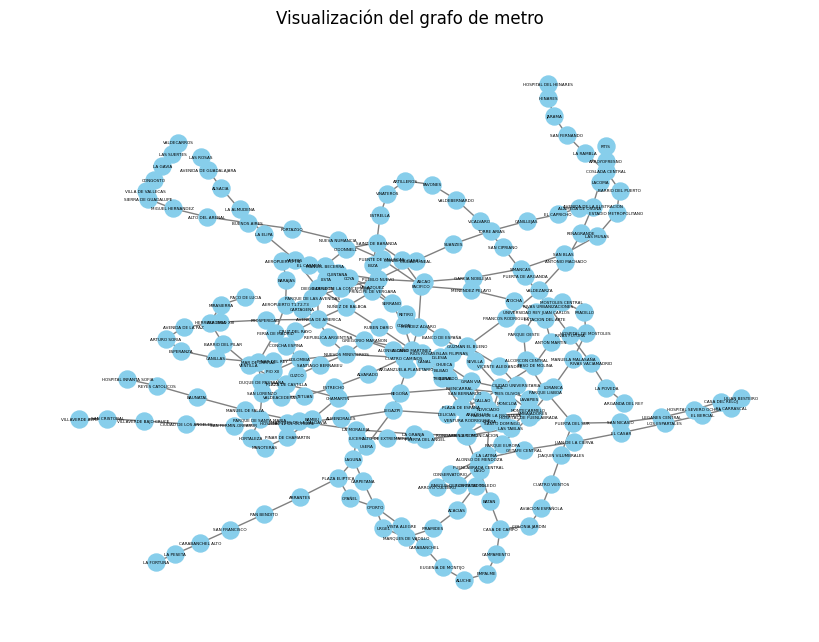

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Cargar el archivo GEXF
G = nx.read_gexf("grafo.gexf")

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=150, edge_color='gray', font_size=3)
plt.title("Visualización del grafo de metro")
plt.show()

Aquí podemos ver las lineas de metro y cómo se conectan entre ellas, hemos intentado buscar una imagen en la que se vea claramente alguna de ellas. Aunque no podemos asegurar que en todas las ejecuciones salga bien representado.

#### Comunidades detectadas de Louvian

C:\Users\diego\AppData\Local\Temp\ipykernel_10648\2732084113.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', num_comunidades)


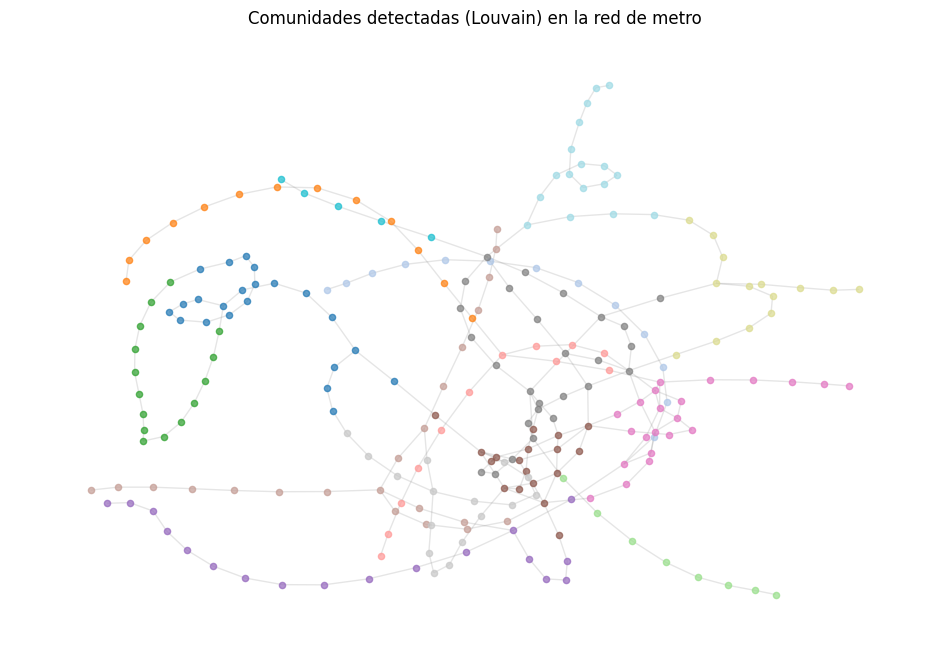

In [10]:
# Detectar comunidades con Louvain
communities_louvain = community.louvain_communities(G_subset)
# Número de comunidades detectadas
num_comunidades = len(communities_louvain)
# Posiciones de los nodos en el layout
pos = nx.spring_layout(G_subset, seed=42)
# Crear figura
plt.figure(figsize=(12,8))
# Colormap para las comunidades
cmap = plt.cm.get_cmap('tab20', num_comunidades)
# Dibujar nodos por comunidad
for idx, comm_set in enumerate(communities_louvain):
    nx.draw_networkx_nodes(
        G_subset,
        pos,
        nodelist=list(comm_set),
        node_color=[cmap(idx)],
        node_size=20,
        alpha=0.7
    )
nx.draw_networkx_edges(G_subset, pos, alpha=0.2, edge_color='gray')
plt.axis('off')
plt.title("Comunidades detectadas (Louvain) en la red de metro")
plt.show()

En este grafo coloreado podemos ver las comunidades que detecta algoritmo de Louvian visualmente. Es interesante destacar que, lógicamente, los finales de linea forman, en su mayoría comunidades propias, ya que las paradas que están en los finales de línea, por lo general, solo se conectan entre ellas. Como apunte extra, evidentemente esto no ocurre en las líneas circulares.

#### Comunidades detectadas de Girvan-Newman

C:\Users\diego\AppData\Local\Temp\ipykernel_10648\2424735385.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', num_comunidades)


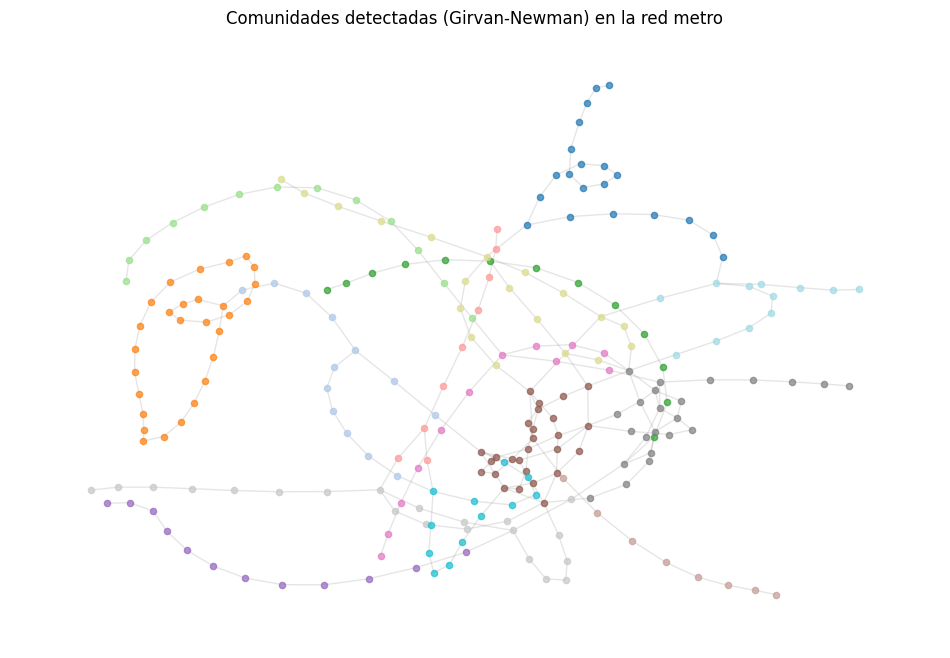

In [11]:
# Número de comunidades detectadas
num_comunidades = len(best_partition)
# Posiciones de los nodos en el layout
pos = nx.spring_layout(G_subset, seed=42)
# Crear figura
plt.figure(figsize=(12,8))
# Colormap para las comunidades
cmap = plt.cm.get_cmap('tab20', num_comunidades)
# Dibujar nodos por comunidad
for idx, comm_set in enumerate(best_partition):
    nx.draw_networkx_nodes(
        G_subset,
        pos,
        nodelist=list(comm_set),
        node_color=[cmap(idx)],
        node_size=20,
        alpha=0.7
    )
nx.draw_networkx_edges(G_subset, pos, alpha=0.2, edge_color='gray')
plt.axis('off')
plt.title("Comunidades detectadas (Girvan-Newman) en la red metro")
plt.show()

Por último, en este grafo coloreado, podemos ver las comunidades detectadas por el algoritmo Girvan-Newman visualmente. Podemos ver que las comunidades detectadas siguen la lógica comentada arriba sobre el algoritmo, siendo una selección más modular y, de la misma manera que el algoritmo de Louvain, los finales de línea son más propensos a formar comunidades propias.